# Scalability of *in situ* backpropagation

In this notebook, we explore the scalability of *in situ* backpropagation as it pertains to the tradeoff between noise and energy efficiency and latency of photonic devices. 
- As far as scalability of the photonic advantage, we do our best to incorporate all of the different elements that contribute to the total energy consumption in the hybrid photonic neural network design, dominated by optoelectronic conversions and signal amplification, and any assumptions for this calculation are provided in the main text and/or Supplementary Material of the paper.
- As far as noise error scaling, we explore the tradeoffs of various errors (e.g., systematic in the various photonic elements and random noise at the photodetector). We then perform large-scale simulations on MNIST data to show that realistic problems can be solved using our approach in the presence of error.



In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
pip install simphox

Note: you may need to restart the kernel to use updated packages.


<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
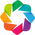

[CpuDevice(id=0)]

In [3]:
from simphox.circuit import rectangular
from simphox.utils import random_unitary
from jax import jit
import jax
import numpy as np
import jax.numpy as jnp
from mlflow import log_metric, log_param, log_artifacts
import wandb

import holoviews as hv
hv.extension('bokeh')

from dataclasses import dataclass

jax.config.update('jax_platform_name', 'cpu')  # change to cpu if not using gpu (slower!)
jax.config.update("jax_enable_x64", False)
jax.devices()

In [4]:
mesh = rectangular(random_unitary(256).astype(np.complex64)) # use this object to get the necessary functions
mesh_0 = mesh
mesh_1 = rectangular(random_unitary(256).astype(np.complex64))
mesh_2 = rectangular(random_unitary(256).astype(np.complex64))

In [5]:
from PIL import Image, ImageFilter

In [10]:
from keras.datasets import cifar10
from utils import CIFARTenDataProcessor

cifar_dp = CIFARTenDataProcessor()
data = cifar_dp.fourier(8)

In [11]:
print(data.y_test.shape)

(10000, 10)


In [12]:
from jax import grad
from jax import vjp

prop_jit = jit(mesh.propagate_matrix_fn(use_jax=True, explicit=True))
prop = mesh.propagate_matrix_fn(use_jax=False, explicit=True)
matrix_fn = mesh.matrix_fn(use_jax=True)
ones = jnp.ones(256, dtype=jnp.complex64)
tr = lambda u: jnp.abs(u[0, 0]) ** 2
fn = lambda params: tr(matrix_fn(params))
fn_jit = jit(fn)

grad_fn = grad(fn)
grad_fn_jit = grad(fn_jit)

In [13]:
from jax.scipy.special import logsumexp
from jax import vmap, vjp

def dropout_softmax(outputs, num_classes: int = 10):
    return jax.nn.log_softmax(outputs[:num_classes]).astype(jnp.float32)

matrix_fn = jit(mesh.matrix_fn(use_jax=True))

def cifar_onn(params, inputs):
    # per-example predictions
    outputs = inputs
    for param in params:
        outputs = jnp.abs(matrix_fn(param, outputs))[:, 0] + 0j
    outputs = jnp.abs(outputs) ** 2
    return dropout_softmax(outputs, 10)

batched_cifar_onn = vmap(cifar_onn, in_axes=(None, 0))

In [14]:
@jit
def batch_loss(params, inputs, targets):
    preds = batched_cifar_onn(params, inputs)
    return -jnp.mean(preds.squeeze() * targets).real

@jit
def loss(params, inputs, targets):
    preds = cifar_onn(params, inputs)
    return -jnp.mean(preds.squeeze() * targets).real

In [ ]:
def evaluate(params, images, targets):
    target_class = jnp.argmax(targets, axis=1)
    predicted_class = jnp.argmax(batched_cifar_onn(params, images), axis=1)
    return jnp.mean(predicted_class == target_class)

In [68]:
from jax.example_libraries.optimizers import adam
from tqdm.notebook import tqdm as pbar
from jax import value_and_grad

step_size = 0.0001

num_iters = 1200
batch_size = 128
num_epochs = 50

x_train = jnp.array(data.x_train).astype(np.complex64)
y_train = jnp.array(data.y_train).astype(np.float32)

In [69]:
x_test = jnp.array(data.x_test).astype(np.complex64)
y_test = jnp.array(data.y_test).astype(np.float32)

opt_init, opt_update, get_params = adam(step_size=step_size)
init_params = [mesh_0.params, mesh_1.params, mesh_2.params]
init = opt_init(init_params)

def update_fn(i, state):
    start = (i * batch_size) % 50000
    stop = ((i + 1) * batch_size) % 50000
    v, g = value_and_grad(batch_loss)(get_params(state), x_train[start:stop], y_train[start:stop])
    return v, opt_update(i, g, state)

losses = []
opt_state = init

for epoch in range(num_epochs):
    iterator = pbar(range(x_train.shape[0]//batch_size))
    for i in iterator:
        v, opt_state = update_fn(i, opt_state)
        losses.append(v)
        iterator.set_description(f"𝓛: {v:.5f}")
    print(f"Batch size {batch_size}, epoch {epoch+1}: test accuracy is {evaluate(get_params(opt_state), x_test, y_test).item()}")
    # print(f"Train accuracy is {evaluate(get_params(opt_state), x_train, y_train).item()}")

  0%|          | 0/390 [00:00<?, ?it/s]

Batch size 128, epoch 1: test accuracy is 0.23269999027252197


  0%|          | 0/390 [00:00<?, ?it/s]

Batch size 128, epoch 2: test accuracy is 0.26080000400543213


  0%|          | 0/390 [00:00<?, ?it/s]

Batch size 128, epoch 3: test accuracy is 0.27480000257492065


  0%|          | 0/390 [00:00<?, ?it/s]

Batch size 128, epoch 4: test accuracy is 0.28459998965263367


  0%|          | 0/390 [00:00<?, ?it/s]

Batch size 128, epoch 5: test accuracy is 0.2912999987602234


  0%|          | 0/390 [00:00<?, ?it/s]

Batch size 128, epoch 6: test accuracy is 0.296999990940094


  0%|          | 0/390 [00:00<?, ?it/s]

Batch size 128, epoch 7: test accuracy is 0.3027999997138977


  0%|          | 0/390 [00:00<?, ?it/s]

Batch size 128, epoch 8: test accuracy is 0.31219998002052307


  0%|          | 0/390 [00:00<?, ?it/s]

Batch size 128, epoch 9: test accuracy is 0.3148999810218811


  0%|          | 0/390 [00:00<?, ?it/s]

Batch size 128, epoch 10: test accuracy is 0.313400000333786


  0%|          | 0/390 [00:00<?, ?it/s]

Batch size 128, epoch 11: test accuracy is 0.31450000405311584


  0%|          | 0/390 [00:00<?, ?it/s]

Batch size 128, epoch 12: test accuracy is 0.3182999789714813


  0%|          | 0/390 [00:00<?, ?it/s]

Batch size 128, epoch 13: test accuracy is 0.31839999556541443


  0%|          | 0/390 [00:00<?, ?it/s]

Batch size 128, epoch 14: test accuracy is 0.3215000033378601


  0%|          | 0/390 [00:00<?, ?it/s]

Batch size 128, epoch 15: test accuracy is 0.3240000009536743


  0%|          | 0/390 [00:00<?, ?it/s]

Batch size 128, epoch 16: test accuracy is 0.32580000162124634


  0%|          | 0/390 [00:00<?, ?it/s]

Batch size 128, epoch 17: test accuracy is 0.32659998536109924


  0%|          | 0/390 [00:00<?, ?it/s]

Batch size 128, epoch 18: test accuracy is 0.32850000262260437


  0%|          | 0/390 [00:00<?, ?it/s]

Batch size 128, epoch 19: test accuracy is 0.32989999651908875


  0%|          | 0/390 [00:00<?, ?it/s]

Batch size 128, epoch 20: test accuracy is 0.3319999873638153


  0%|          | 0/390 [00:00<?, ?it/s]

Batch size 128, epoch 21: test accuracy is 0.33409997820854187


  0%|          | 0/390 [00:00<?, ?it/s]

Batch size 128, epoch 22: test accuracy is 0.33559998869895935


  0%|          | 0/390 [00:00<?, ?it/s]

Batch size 128, epoch 23: test accuracy is 0.3366999924182892


  0%|          | 0/390 [00:00<?, ?it/s]

Batch size 128, epoch 24: test accuracy is 0.33719998598098755


  0%|          | 0/390 [00:00<?, ?it/s]

Batch size 128, epoch 25: test accuracy is 0.3369999825954437


  0%|          | 0/390 [00:00<?, ?it/s]

Batch size 128, epoch 26: test accuracy is 0.3391999900341034


  0%|          | 0/390 [00:00<?, ?it/s]

Batch size 128, epoch 27: test accuracy is 0.3402999937534332


  0%|          | 0/390 [00:00<?, ?it/s]

Batch size 128, epoch 28: test accuracy is 0.34049999713897705


  0%|          | 0/390 [00:00<?, ?it/s]

Batch size 128, epoch 29: test accuracy is 0.3416999876499176


  0%|          | 0/390 [00:00<?, ?it/s]

Batch size 128, epoch 30: test accuracy is 0.34199997782707214


  0%|          | 0/390 [00:00<?, ?it/s]

Batch size 128, epoch 31: test accuracy is 0.3434000015258789


  0%|          | 0/390 [00:00<?, ?it/s]

Batch size 128, epoch 32: test accuracy is 0.34599998593330383


  0%|          | 0/390 [00:00<?, ?it/s]

Batch size 128, epoch 33: test accuracy is 0.34700000286102295


  0%|          | 0/390 [00:00<?, ?it/s]

Batch size 128, epoch 34: test accuracy is 0.34769999980926514


  0%|          | 0/390 [00:00<?, ?it/s]

Batch size 128, epoch 35: test accuracy is 0.3489999771118164


  0%|          | 0/390 [00:00<?, ?it/s]

Batch size 128, epoch 36: test accuracy is 0.35099998116493225


  0%|          | 0/390 [00:00<?, ?it/s]

Batch size 128, epoch 37: test accuracy is 0.35199999809265137


  0%|          | 0/390 [00:00<?, ?it/s]

Batch size 128, epoch 38: test accuracy is 0.35199999809265137


  0%|          | 0/390 [00:00<?, ?it/s]

Batch size 128, epoch 39: test accuracy is 0.353300005197525


  0%|          | 0/390 [00:00<?, ?it/s]

Batch size 128, epoch 40: test accuracy is 0.3538999855518341


  0%|          | 0/390 [00:00<?, ?it/s]

Batch size 128, epoch 41: test accuracy is 0.3536999821662903


  0%|          | 0/390 [00:00<?, ?it/s]

Batch size 128, epoch 42: test accuracy is 0.3540000021457672


  0%|          | 0/390 [00:00<?, ?it/s]

Batch size 128, epoch 43: test accuracy is 0.35359999537467957


  0%|          | 0/390 [00:00<?, ?it/s]

Batch size 128, epoch 44: test accuracy is 0.3527999818325043


  0%|          | 0/390 [00:00<?, ?it/s]

Batch size 128, epoch 45: test accuracy is 0.3527999818325043


  0%|          | 0/390 [00:00<?, ?it/s]

Batch size 128, epoch 46: test accuracy is 0.35409998893737793


  0%|          | 0/390 [00:00<?, ?it/s]

Batch size 128, epoch 47: test accuracy is 0.3554999828338623


  0%|          | 0/390 [00:00<?, ?it/s]

Batch size 128, epoch 48: test accuracy is 0.35599997639656067


  0%|          | 0/390 [00:00<?, ?it/s]

Batch size 128, epoch 49: test accuracy is 0.35749998688697815


  0%|          | 0/390 [00:00<?, ?it/s]

Batch size 128, epoch 50: test accuracy is 0.35830000042915344


In [72]:
print(f"After 50 batches: train accuracy is {evaluate(get_params(opt_state), x_train, y_train).item()}")

After 50 batches: train accuracy is 0.42931997776031494


In [73]:
new_num_epochs = 100

for epoch in range(new_num_epochs):
    iterator = pbar(range(x_train.shape[0]//batch_size))
    for i in iterator:
        v, opt_state = update_fn(i, opt_state)
        losses.append(v)
        iterator.set_description(f"𝓛: {v:.5f}")
    print(f"Batch size {batch_size}, epoch {50+epoch+1}: test accuracy is {evaluate(get_params(opt_state), x_test, y_test).item()}")

  0%|          | 0/390 [00:00<?, ?it/s]

Batch size 128, epoch 51: test accuracy is 0.35740000009536743


  0%|          | 0/390 [00:00<?, ?it/s]

Batch size 128, epoch 52: test accuracy is 0.3570999801158905


  0%|          | 0/390 [00:00<?, ?it/s]

Batch size 128, epoch 53: test accuracy is 0.3587999939918518


  0%|          | 0/390 [00:00<?, ?it/s]

Batch size 128, epoch 54: test accuracy is 0.3601999878883362


  0%|          | 0/390 [00:00<?, ?it/s]

Batch size 128, epoch 55: test accuracy is 0.36039999127388


  0%|          | 0/390 [00:00<?, ?it/s]

Batch size 128, epoch 56: test accuracy is 0.3610000014305115


  0%|          | 0/390 [00:00<?, ?it/s]

Batch size 128, epoch 57: test accuracy is 0.3621000051498413


  0%|          | 0/390 [00:00<?, ?it/s]

Batch size 128, epoch 58: test accuracy is 0.3619000017642975


  0%|          | 0/390 [00:00<?, ?it/s]

Batch size 128, epoch 59: test accuracy is 0.3628999888896942


  0%|          | 0/390 [00:00<?, ?it/s]

Batch size 128, epoch 60: test accuracy is 0.3621000051498413


  0%|          | 0/390 [00:00<?, ?it/s]

Batch size 128, epoch 61: test accuracy is 0.3621000051498413


  0%|          | 0/390 [00:00<?, ?it/s]

Batch size 128, epoch 62: test accuracy is 0.3626999855041504


  0%|          | 0/390 [00:00<?, ?it/s]

Batch size 128, epoch 63: test accuracy is 0.36389997601509094


  0%|          | 0/390 [00:00<?, ?it/s]

Batch size 128, epoch 64: test accuracy is 0.36389997601509094


  0%|          | 0/390 [00:00<?, ?it/s]

Batch size 128, epoch 65: test accuracy is 0.3646000027656555


  0%|          | 0/390 [00:00<?, ?it/s]

Batch size 128, epoch 66: test accuracy is 0.36550000309944153


  0%|          | 0/390 [00:00<?, ?it/s]

Batch size 128, epoch 67: test accuracy is 0.36730000376701355


  0%|          | 0/390 [00:00<?, ?it/s]

Batch size 128, epoch 68: test accuracy is 0.3671000003814697


  0%|          | 0/390 [00:00<?, ?it/s]

Batch size 128, epoch 69: test accuracy is 0.36789998412132263


  0%|          | 0/390 [00:00<?, ?it/s]

Batch size 128, epoch 70: test accuracy is 0.3685999810695648


  0%|          | 0/390 [00:00<?, ?it/s]

Batch size 128, epoch 71: test accuracy is 0.36949998140335083


  0%|          | 0/390 [00:00<?, ?it/s]

Batch size 128, epoch 72: test accuracy is 0.37039998173713684


  0%|          | 0/390 [00:00<?, ?it/s]

Batch size 128, epoch 73: test accuracy is 0.37109997868537903


  0%|          | 0/390 [00:00<?, ?it/s]

Batch size 128, epoch 74: test accuracy is 0.37129998207092285


  0%|          | 0/390 [00:00<?, ?it/s]

Batch size 128, epoch 75: test accuracy is 0.37129998207092285


  0%|          | 0/390 [00:00<?, ?it/s]

Batch size 128, epoch 76: test accuracy is 0.37139999866485596


  0%|          | 0/390 [00:00<?, ?it/s]

Batch size 128, epoch 77: test accuracy is 0.37209999561309814


  0%|          | 0/390 [00:00<?, ?it/s]

Batch size 128, epoch 78: test accuracy is 0.37229999899864197


  0%|          | 0/390 [00:00<?, ?it/s]

Batch size 128, epoch 79: test accuracy is 0.37229999899864197


  0%|          | 0/390 [00:00<?, ?it/s]

Batch size 128, epoch 80: test accuracy is 0.3734999895095825


  0%|          | 0/390 [00:00<?, ?it/s]

Batch size 128, epoch 81: test accuracy is 0.37279999256134033


  0%|          | 0/390 [00:00<?, ?it/s]

Batch size 128, epoch 82: test accuracy is 0.3734999895095825


  0%|          | 0/390 [00:00<?, ?it/s]

Batch size 128, epoch 83: test accuracy is 0.3748999834060669


  0%|          | 0/390 [00:00<?, ?it/s]

Batch size 128, epoch 84: test accuracy is 0.37549999356269836


  0%|          | 0/390 [00:00<?, ?it/s]

Batch size 128, epoch 85: test accuracy is 0.3747999966144562


  0%|          | 0/390 [00:00<?, ?it/s]

Batch size 128, epoch 86: test accuracy is 0.3747999966144562


  0%|          | 0/390 [00:00<?, ?it/s]

Batch size 128, epoch 87: test accuracy is 0.37539997696876526


  0%|          | 0/390 [00:00<?, ?it/s]

Batch size 128, epoch 88: test accuracy is 0.375900000333786


  0%|          | 0/390 [00:00<?, ?it/s]

Batch size 128, epoch 89: test accuracy is 0.3763999938964844


  0%|          | 0/390 [00:00<?, ?it/s]

Batch size 128, epoch 90: test accuracy is 0.37619999051094055


  0%|          | 0/390 [00:00<?, ?it/s]

Batch size 128, epoch 91: test accuracy is 0.37619999051094055


  0%|          | 0/390 [00:00<?, ?it/s]

Batch size 128, epoch 92: test accuracy is 0.3757999837398529


  0%|          | 0/390 [00:00<?, ?it/s]

Batch size 128, epoch 93: test accuracy is 0.3764999806880951


  0%|          | 0/390 [00:00<?, ?it/s]

Batch size 128, epoch 94: test accuracy is 0.3763999938964844


  0%|          | 0/390 [00:00<?, ?it/s]

Batch size 128, epoch 95: test accuracy is 0.3764999806880951


  0%|          | 0/390 [00:00<?, ?it/s]

Batch size 128, epoch 96: test accuracy is 0.37689998745918274


  0%|          | 0/390 [00:00<?, ?it/s]

Batch size 128, epoch 97: test accuracy is 0.3764999806880951


  0%|          | 0/390 [00:00<?, ?it/s]

Batch size 128, epoch 98: test accuracy is 0.37619999051094055


  0%|          | 0/390 [00:00<?, ?it/s]

Batch size 128, epoch 99: test accuracy is 0.3757999837398529


  0%|          | 0/390 [00:00<?, ?it/s]

Batch size 128, epoch 100: test accuracy is 0.37610000371932983


  0%|          | 0/390 [00:00<?, ?it/s]

Batch size 128, epoch 101: test accuracy is 0.3763999938964844


  0%|          | 0/390 [00:00<?, ?it/s]

Batch size 128, epoch 102: test accuracy is 0.37599998712539673


  0%|          | 0/390 [00:00<?, ?it/s]

Batch size 128, epoch 103: test accuracy is 0.37629997730255127


  0%|          | 0/390 [00:00<?, ?it/s]

Batch size 128, epoch 104: test accuracy is 0.376800000667572


  0%|          | 0/390 [00:00<?, ?it/s]

Batch size 128, epoch 105: test accuracy is 0.3772999942302704


  0%|          | 0/390 [00:00<?, ?it/s]

Batch size 128, epoch 106: test accuracy is 0.3772999942302704


  0%|          | 0/390 [00:00<?, ?it/s]

Batch size 128, epoch 107: test accuracy is 0.3773999810218811


  0%|          | 0/390 [00:00<?, ?it/s]

Batch size 128, epoch 108: test accuracy is 0.3775999844074249


  0%|          | 0/390 [00:00<?, ?it/s]

Batch size 128, epoch 109: test accuracy is 0.3773999810218811


  0%|          | 0/390 [00:00<?, ?it/s]

Batch size 128, epoch 110: test accuracy is 0.3771999776363373


  0%|          | 0/390 [00:00<?, ?it/s]

Batch size 128, epoch 111: test accuracy is 0.37700000405311584


  0%|          | 0/390 [00:00<?, ?it/s]

Batch size 128, epoch 112: test accuracy is 0.3775999844074249


  0%|          | 0/390 [00:00<?, ?it/s]

Batch size 128, epoch 113: test accuracy is 0.37860000133514404


  0%|          | 0/390 [00:00<?, ?it/s]

Batch size 128, epoch 114: test accuracy is 0.37869998812675476


  0%|          | 0/390 [00:00<?, ?it/s]

Batch size 128, epoch 115: test accuracy is 0.3788999915122986


  0%|          | 0/390 [00:00<?, ?it/s]

Batch size 128, epoch 116: test accuracy is 0.3791999816894531


  0%|          | 0/390 [00:00<?, ?it/s]

Batch size 128, epoch 117: test accuracy is 0.3799999952316284


  0%|          | 0/390 [00:00<?, ?it/s]

Batch size 128, epoch 118: test accuracy is 0.3807999789714813


  0%|          | 0/390 [00:00<?, ?it/s]

Batch size 128, epoch 119: test accuracy is 0.38099998235702515


  0%|          | 0/390 [00:00<?, ?it/s]

Batch size 128, epoch 120: test accuracy is 0.38099998235702515


  0%|          | 0/390 [00:00<?, ?it/s]

Batch size 128, epoch 121: test accuracy is 0.38119998574256897


  0%|          | 0/390 [00:00<?, ?it/s]

Batch size 128, epoch 122: test accuracy is 0.3814999759197235


  0%|          | 0/390 [00:00<?, ?it/s]

Batch size 128, epoch 123: test accuracy is 0.38199999928474426


  0%|          | 0/390 [00:00<?, ?it/s]

Batch size 128, epoch 124: test accuracy is 0.3824999928474426


  0%|          | 0/390 [00:00<?, ?it/s]

Batch size 128, epoch 125: test accuracy is 0.3823999762535095


  0%|          | 0/390 [00:00<?, ?it/s]

Batch size 128, epoch 126: test accuracy is 0.38259997963905334


  0%|          | 0/390 [00:00<?, ?it/s]

Batch size 128, epoch 127: test accuracy is 0.3824999928474426


  0%|          | 0/390 [00:00<?, ?it/s]

Batch size 128, epoch 128: test accuracy is 0.382999986410141


  0%|          | 0/390 [00:00<?, ?it/s]

Batch size 128, epoch 129: test accuracy is 0.38279998302459717


  0%|          | 0/390 [00:00<?, ?it/s]

Batch size 128, epoch 130: test accuracy is 0.3828999996185303


  0%|          | 0/390 [00:00<?, ?it/s]

Batch size 128, epoch 131: test accuracy is 0.3837999999523163


  0%|          | 0/390 [00:00<?, ?it/s]

Batch size 128, epoch 132: test accuracy is 0.38339999318122864


  0%|          | 0/390 [00:00<?, ?it/s]

Batch size 128, epoch 133: test accuracy is 0.383899986743927


  0%|          | 0/390 [00:00<?, ?it/s]

Batch size 128, epoch 134: test accuracy is 0.38359999656677246


  0%|          | 0/390 [00:00<?, ?it/s]

Batch size 128, epoch 135: test accuracy is 0.3831999897956848


  0%|          | 0/390 [00:00<?, ?it/s]

Batch size 128, epoch 136: test accuracy is 0.38259997963905334


  0%|          | 0/390 [00:00<?, ?it/s]

Batch size 128, epoch 137: test accuracy is 0.38269999623298645


  0%|          | 0/390 [00:00<?, ?it/s]

Batch size 128, epoch 138: test accuracy is 0.3831999897956848


  0%|          | 0/390 [00:00<?, ?it/s]

Batch size 128, epoch 139: test accuracy is 0.3831999897956848


  0%|          | 0/390 [00:00<?, ?it/s]

Batch size 128, epoch 140: test accuracy is 0.38329997658729553


  0%|          | 0/390 [00:00<?, ?it/s]

Batch size 128, epoch 141: test accuracy is 0.38329997658729553


  0%|          | 0/390 [00:00<?, ?it/s]

Batch size 128, epoch 142: test accuracy is 0.38339999318122864


  0%|          | 0/390 [00:00<?, ?it/s]

Batch size 128, epoch 143: test accuracy is 0.38329997658729553


  0%|          | 0/390 [00:00<?, ?it/s]

Batch size 128, epoch 144: test accuracy is 0.382999986410141


  0%|          | 0/390 [00:00<?, ?it/s]

Batch size 128, epoch 145: test accuracy is 0.38279998302459717


  0%|          | 0/390 [00:00<?, ?it/s]

Batch size 128, epoch 146: test accuracy is 0.38259997963905334


  0%|          | 0/390 [00:00<?, ?it/s]

Batch size 128, epoch 147: test accuracy is 0.38279998302459717


  0%|          | 0/390 [00:00<?, ?it/s]

Batch size 128, epoch 148: test accuracy is 0.3828999996185303


  0%|          | 0/390 [00:00<?, ?it/s]

Batch size 128, epoch 149: test accuracy is 0.38259997963905334


  0%|          | 0/390 [00:00<?, ?it/s]

Batch size 128, epoch 150: test accuracy is 0.3828999996185303


In [74]:
print(f"After 150 batches: train accuracy is {evaluate(get_params(opt_state), x_train, y_train).item()}")

After 150 batches: train accuracy is 0.49201998114585876


In [75]:
new_num_epochs = 100

for epoch in range(new_num_epochs):
    iterator = pbar(range(x_train.shape[0]//batch_size))
    for i in iterator:
        v, opt_state = update_fn(i, opt_state)
        losses.append(v)
        iterator.set_description(f"𝓛: {v:.5f}")
    print(f"Batch size {batch_size}, epoch {150+epoch+1}: test accuracy is {evaluate(get_params(opt_state), x_test, y_test).item()}")

  0%|          | 0/390 [00:00<?, ?it/s]

Batch size 128, epoch 151: test accuracy is 0.3831000030040741


  0%|          | 0/390 [00:00<?, ?it/s]

Batch size 128, epoch 152: test accuracy is 0.38359999656677246


  0%|          | 0/390 [00:00<?, ?it/s]

Batch size 128, epoch 153: test accuracy is 0.3840000033378601


  0%|          | 0/390 [00:00<?, ?it/s]

Batch size 128, epoch 154: test accuracy is 0.383899986743927


  0%|          | 0/390 [00:00<?, ?it/s]

Batch size 128, epoch 155: test accuracy is 0.38449999690055847


  0%|          | 0/390 [00:00<?, ?it/s]

Batch size 128, epoch 156: test accuracy is 0.3849000036716461


  0%|          | 0/390 [00:00<?, ?it/s]

Batch size 128, epoch 157: test accuracy is 0.384799987077713


  0%|          | 0/390 [00:00<?, ?it/s]

Batch size 128, epoch 158: test accuracy is 0.3854999840259552


  0%|          | 0/390 [00:00<?, ?it/s]

Batch size 128, epoch 159: test accuracy is 0.38519999384880066


  0%|          | 0/390 [00:00<?, ?it/s]

Batch size 128, epoch 160: test accuracy is 0.38599997758865356


  0%|          | 0/390 [00:00<?, ?it/s]

Batch size 128, epoch 161: test accuracy is 0.38609999418258667


  0%|          | 0/390 [00:00<?, ?it/s]

Batch size 128, epoch 162: test accuracy is 0.3862999975681305


  0%|          | 0/390 [00:00<?, ?it/s]

Batch size 128, epoch 163: test accuracy is 0.3865000009536743


  0%|          | 0/390 [00:00<?, ?it/s]

Batch size 128, epoch 164: test accuracy is 0.3868999779224396


  0%|          | 0/390 [00:00<?, ?it/s]

Batch size 128, epoch 165: test accuracy is 0.3868999779224396


  0%|          | 0/390 [00:00<?, ?it/s]

Batch size 128, epoch 166: test accuracy is 0.3868999779224396


  0%|          | 0/390 [00:00<?, ?it/s]

Batch size 128, epoch 167: test accuracy is 0.38769999146461487


  0%|          | 0/390 [00:00<?, ?it/s]

Batch size 128, epoch 168: test accuracy is 0.3877999782562256


  0%|          | 0/390 [00:00<?, ?it/s]

Batch size 128, epoch 169: test accuracy is 0.3878999948501587


  0%|          | 0/390 [00:00<?, ?it/s]

Batch size 128, epoch 170: test accuracy is 0.38850000500679016


  0%|          | 0/390 [00:00<?, ?it/s]

Batch size 128, epoch 171: test accuracy is 0.3887999951839447


  0%|          | 0/390 [00:00<?, ?it/s]

Batch size 128, epoch 172: test accuracy is 0.38850000500679016


  0%|          | 0/390 [00:00<?, ?it/s]

Batch size 128, epoch 173: test accuracy is 0.38850000500679016


  0%|          | 0/390 [00:00<?, ?it/s]

Batch size 128, epoch 174: test accuracy is 0.3888999819755554


  0%|          | 0/390 [00:00<?, ?it/s]

Batch size 128, epoch 175: test accuracy is 0.38909998536109924


  0%|          | 0/390 [00:00<?, ?it/s]

Batch size 128, epoch 176: test accuracy is 0.3888999819755554


  0%|          | 0/390 [00:00<?, ?it/s]

Batch size 128, epoch 177: test accuracy is 0.3888999819755554


  0%|          | 0/390 [00:00<?, ?it/s]

Batch size 128, epoch 178: test accuracy is 0.3872999846935272


  0%|          | 0/390 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [76]:
print(f"After 177 batches: train accuracy is {evaluate(get_params(opt_state), x_train, y_train).item()}")

After 177 batches: train accuracy is 0.5049799680709839


In [ ]:
# increasing step size to 0.0003
new_num_epochs = 30
step_size = 0.0003
for epoch in range(new_num_epochs):
    iterator = pbar(range(x_train.shape[0]//batch_size))
    for i in iterator:
        v, opt_state = update_fn(i, opt_state)
        losses.append(v)
        iterator.set_description(f"𝓛: {v:.5f}")
    print(f"Batch size {batch_size}, epoch {177+epoch+1}: test accuracy is {evaluate(get_params(opt_state), x_test, y_test).item()}")

  0%|          | 0/390 [00:00<?, ?it/s]

Batch size 128, epoch 178: test accuracy is 0.38769999146461487


  0%|          | 0/390 [00:00<?, ?it/s]

Batch size 128, epoch 179: test accuracy is 0.3878999948501587


  0%|          | 0/390 [00:00<?, ?it/s]

Batch size 128, epoch 180: test accuracy is 0.3885999917984009


  0%|          | 0/390 [00:00<?, ?it/s]

Batch size 128, epoch 181: test accuracy is 0.38819998502731323


  0%|          | 0/390 [00:00<?, ?it/s]

Batch size 128, epoch 182: test accuracy is 0.3885999917984009


  0%|          | 0/390 [00:00<?, ?it/s]

Batch size 128, epoch 183: test accuracy is 0.3886999785900116


  0%|          | 0/390 [00:00<?, ?it/s]

Batch size 128, epoch 184: test accuracy is 0.3885999917984009


  0%|          | 0/390 [00:00<?, ?it/s]

Batch size 128, epoch 185: test accuracy is 0.3888999819755554


  0%|          | 0/390 [00:00<?, ?it/s]

Batch size 128, epoch 186: test accuracy is 0.3888999819755554


  0%|          | 0/390 [00:00<?, ?it/s]

Batch size 128, epoch 187: test accuracy is 0.3888999819755554


  0%|          | 0/390 [00:00<?, ?it/s]

Batch size 128, epoch 188: test accuracy is 0.3895999789237976


  0%|          | 0/390 [00:00<?, ?it/s]

Batch size 128, epoch 189: test accuracy is 0.3896999955177307


  0%|          | 0/390 [00:00<?, ?it/s]

Batch size 128, epoch 190: test accuracy is 0.3901999890804291


  0%|          | 0/390 [00:00<?, ?it/s]

Batch size 128, epoch 191: test accuracy is 0.38979998230934143


  0%|          | 0/390 [00:00<?, ?it/s]

Batch size 128, epoch 192: test accuracy is 0.3896999955177307


  0%|          | 0/390 [00:00<?, ?it/s]

Batch size 128, epoch 193: test accuracy is 0.38920000195503235


  0%|          | 0/390 [00:00<?, ?it/s]

Batch size 128, epoch 194: test accuracy is 0.38920000195503235


  0%|          | 0/390 [00:00<?, ?it/s]

Batch size 128, epoch 195: test accuracy is 0.3889999985694885


  0%|          | 0/390 [00:00<?, ?it/s]

Batch size 128, epoch 196: test accuracy is 0.38920000195503235


  0%|          | 0/390 [00:00<?, ?it/s]

Batch size 128, epoch 197: test accuracy is 0.3888999819755554


  0%|          | 0/390 [00:00<?, ?it/s]

Batch size 128, epoch 198: test accuracy is 0.3894999921321869


  0%|          | 0/390 [00:00<?, ?it/s]

Batch size 128, epoch 199: test accuracy is 0.3902999758720398


  0%|          | 0/390 [00:00<?, ?it/s]

Batch size 128, epoch 200: test accuracy is 0.3904999792575836


  0%|          | 0/390 [00:00<?, ?it/s]

Batch size 128, epoch 201: test accuracy is 0.38999998569488525


  0%|          | 0/390 [00:00<?, ?it/s]

Batch size 128, epoch 202: test accuracy is 0.3896999955177307


  0%|          | 0/390 [00:00<?, ?it/s]

Batch size 128, epoch 203: test accuracy is 0.38989999890327454


  0%|          | 0/390 [00:00<?, ?it/s]

Batch size 128, epoch 204: test accuracy is 0.38989999890327454


  0%|          | 0/390 [00:00<?, ?it/s]

Batch size 128, epoch 205: test accuracy is 0.3902999758720398


  0%|          | 0/390 [00:00<?, ?it/s]

Batch size 128, epoch 206: test accuracy is 0.39079999923706055


  0%|          | 0/390 [00:00<?, ?it/s]